In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.max.columns', None)
#pd.set_option('display.max.row', None)

In [229]:
df = pd.read_csv('cars_multiple_linearR.csv')
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Cleaning Data

In [231]:
df[df['Price'].isna()].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
91,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GL 350


In [232]:
x = df.groupby(['Brand','Model']).mean().reset_index()[['Brand','Model','Price']]
x

,Brand,Model,Price
0,Audi,100,3802.294118
1,Audi,80,2654.166667
2,Audi,90,3500.000000
3,Audi,A1,15499.666667
4,Audi,A3,13410.363636
...,...,...,...
308,Volkswagen,Tiguan,23682.352941
309,Volkswagen,Touareg,31311.669853
310,Volkswagen,Touran,13538.894737
311,Volkswagen,Up,10325.000000


In [233]:
clean_df = df.merge(x, left_on=['Brand','Model'], right_on=['Brand','Model'])
clean_df.isna().sum()

Brand             0
Price_x         172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
Price_y           2
dtype: int64

In [234]:
clean_df['Price_x'].fillna(clean_df['Price_y'], inplace=True)

In [235]:
clean_df.drop(columns=['Price_y'],axis=1, inplace=True)
clean_df.rename(columns = {'Price_x' : 'Price'}, inplace=True)
clean_df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
2,BMW,3500.0,sedan,334,2.0,Diesel,no,1999,320
3,BMW,8990.0,other,300,2.2,Petrol,yes,2002,320
4,BMW,11600.0,sedan,142,2.0,Petrol,yes,2005,320
...,...,...,...,...,...,...,...,...,...
4340,Toyota,37700.0,crossover,47,5.7,Gas,yes,2009,Sequoia
4341,Renault,1800.0,hatch,1,1.4,Gas,yes,1988,11
4342,Mercedes-Benz,15300.0,other,234,2.2,Diesel,yes,2008,Sprinter 315
4343,Volkswagen,10500.0,van,299,2.5,Diesel,yes,2002,Syncro


### Melihat Brand dengan rata rata harga tertinggi

<AxesSubplot:ylabel='Brand'>

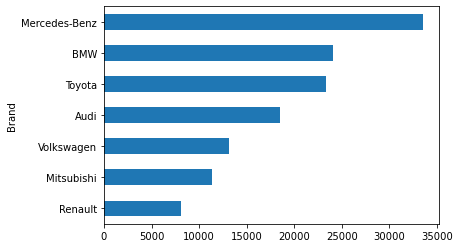

In [260]:
clean_df.groupby('Brand')['Price'].mean().sort_values().plot(kind='barh')

In [ ]:
#Untuk membuktikan kita lihat 20 mobil dengan harga tertinggi

In [462]:
clean_df.sort_values('Price', ascending = False).head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Mileage_Rate
3861,Mercedes-Benz,300000.0,sedan,68,6.0,Petrol,yes,2011,S 600,156 - 230
4114,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500,156 - 230
3866,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S 600,231 - 980
4205,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard,87 - 155
4206,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard,0 - 86
4015,Mercedes-Benz,250000.0,other,6,5.5,Petrol,yes,2016,S 63 AMG,87 - 155
4014,Mercedes-Benz,249999.0,other,3,5.5,Petrol,yes,2016,S 63 AMG,156 - 230
4013,Mercedes-Benz,222000.0,crossover,0,6.3,Petrol,yes,2016,S 63 AMG,87 - 155
4240,Mercedes-Benz,219900.0,crossover,33,5.5,Petrol,yes,2013,G 63 AMG,231 - 980
4241,Mercedes-Benz,219900.0,crossover,30,6.3,Petrol,yes,2013,G 63 AMG,0 - 86


### Melihat Brand dan Model dengan rata rata harga tertinggi

<AxesSubplot:xlabel='Brand,Model'>

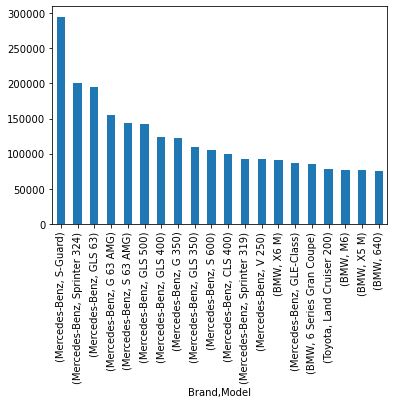

In [266]:
clean_df.groupby(['Brand','Model'])['Price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [319]:
clean_df.describe()

,Price,Mileage,EngineV,Year
count,4343.000000,4345.000000,4195.000000,4345.000000
mean,20345.387371,161.237284,2.790734,2006.550058
std,26721.886275,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,86.000000,1.800000,2003.000000
50%,11700.000000,155.000000,2.200000,2008.000000
75%,22550.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### melihat rata-rata harga tertinggi berdasarkan Mileage

In [325]:
mile=[]
for row in df['Mileage']:
    if row <=86 :
        mile.append('0 - 86')
    elif row <=155:
        mile.append('87 - 155')
    elif row <=230:
        mile.append('156 - 230')
    else:
        mile.append('231 - 980')

clean_df['Mileage_Rate'] = mile
clean_df.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Mileage_Rate
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,231 - 980
1,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320,231 - 980
2,BMW,3500.0,sedan,334,2.0,Diesel,no,1999,320,231 - 980
3,BMW,8990.0,other,300,2.2,Petrol,yes,2002,320,231 - 980
4,BMW,11600.0,sedan,142,2.0,Petrol,yes,2005,320,87 - 155


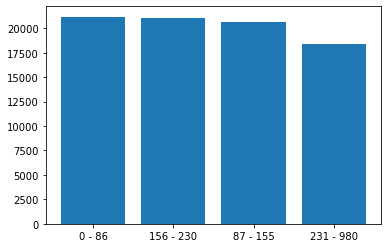

In [347]:
mileager = clean_df.groupby('Mileage_Rate').mean().sort_values('Price', ascending=False).reset_index()[['Mileage_Rate','Price']]
plt.bar(mileager['Mileage_Rate'], mileager['Price'])
plt.show()

### Melihat rata-rata harga tertinggi berdasarkan tahun

In [362]:
clean_df.groupby('Year').mean().sort_values('Price', ascending=False).reset_index()[['Year','Price']].head(10)

,Year,Price
0,2016,73547.422161
1,2015,57454.803004
2,2014,42425.634184
3,1969,34999.000000
4,2013,30585.346784
5,2011,25163.241376
6,2010,22257.194050
7,2012,21411.656537
8,2009,18772.133910
9,2008,16275.200156


### Melihat rata-rata harga tertinggi berdasarkan Body

In [379]:
clean_df.groupby('Body').mean().sort_values('Price').reset_index()[['Body','Price']]

,Body,Price
0,vagon,10076.550777
1,hatch,10103.854256
2,van,13033.308567
3,sedan,16217.679596
4,other,22817.732850
5,crossover,39998.203336


### Melihat rata-rata harga mobil berdasarkan merk dan body

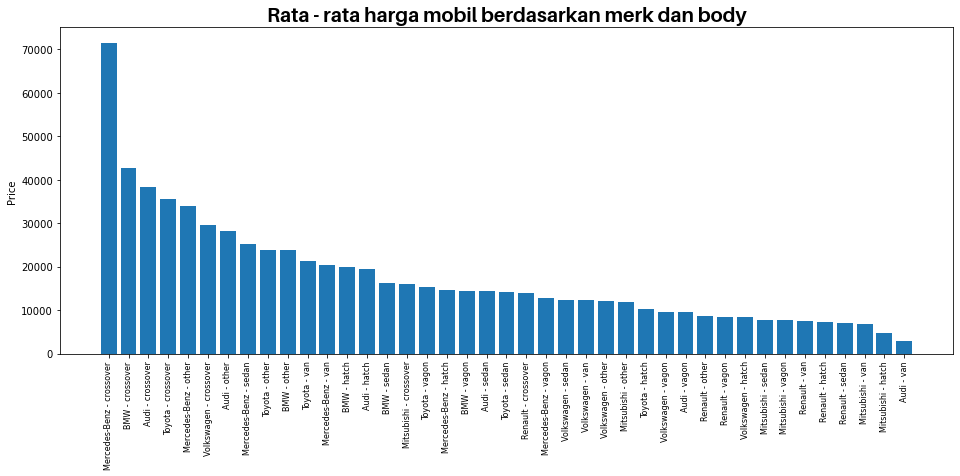

In [451]:
bnb = clean_df.groupby(['Body','Brand']).mean().sort_values('Price', ascending = False).reset_index()[['Price','Body','Brand']]
bnb['Join'] = bnb['Brand'] + ' - ' + bnb['Body']

plt.figure(figsize=(16,6))
plt.title('Rata - rata harga mobil berdasarkan merk dan body',fontdict={'fontname':'Aileron','fontweight':'bold','fontsize':20})
plt.bar(bnb['Join'], bnb['Price'])
plt.xticks(bnb['Join'], rotation='vertical',size=8)
plt.ylabel('Price')
plt.show()

### Melihat perbandingan rata - rata harga berdasarkan Registration dan perbandinganya

In [391]:
clean_df.groupby(['Registration']).mean().sort_values('Price').reset_index()[['Registration','Price']]

,Registration,Price
0,no,4338.375620
1,yes,21960.289951


In [393]:
yesres = clean_df[clean_df['Registration'] == 'yes']
nores = clean_df[clean_df['Registration'] != 'yes']

In [402]:
yesres.shape[0]/clean_df.shape[0] * 100

90.84004602991945

In [403]:
nores.shape[0]/clean_df.shape[0] * 100

9.159953970080553

### Melihat rata-rata harga mobil berdasarkan tipe mesin

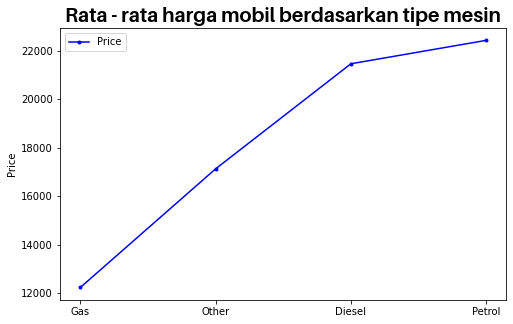

In [422]:
etplot = clean_df.groupby('Engine Type').mean().sort_values('Price').reset_index()[['Price','Engine Type']]

plt.figure(figsize=(8,5))
plt.title('Rata - rata harga mobil berdasarkan tipe mesin',fontdict={'fontname':'Aileron','fontweight':'bold','fontsize':20})
plt.plot(etplot['Engine Type'], etplot['Price'],'b.-', label = 'Price')
plt.ylabel('Price')
plt.legend()
plt.show()

### Melihat rata-rata harga mobil berdasarkan merk dan tipe mesin

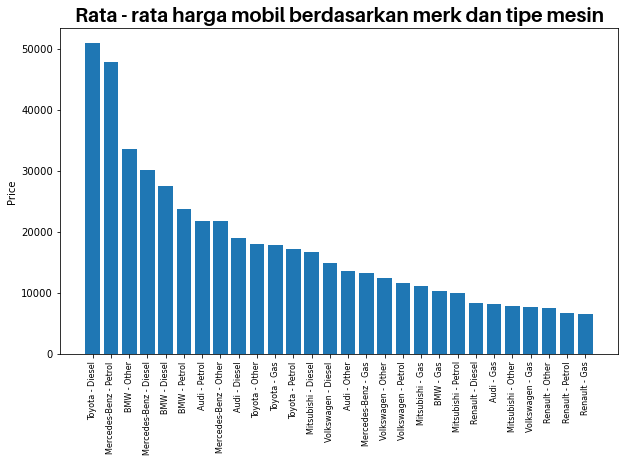

In [443]:
etnb = clean_df.groupby(['Engine Type','Brand']).mean().sort_values('Price', ascending = False).reset_index()[['Price','Engine Type','Brand']]
etnb['Join'] = etnb['Brand'] + ' - ' + etnb['Engine Type']

plt.figure(figsize=(10,6))
plt.title('Rata - rata harga mobil berdasarkan merk dan tipe mesin',fontdict={'fontname':'Aileron','fontweight':'bold','fontsize':20})
plt.bar(etnb['Join'], etnb['Price'])
plt.xticks(etnb['Join'], rotation='vertical',size=8)
plt.ylabel('Price')
plt.show()